In [ ]:
!pip install econml

# Tutorial Econml: Generalized Random Forest

In [13]:
# Load libraries
import pandas as pd
from econml.grf import CausalForest
import matplotlib.pyplot as plt

In [14]:
# Load the experiment dataset
datos = pd.read_csv("experimento-rfm.csv")
datos

,id,outcome,treat,channel,recency,frequency,monetary
0,10001,249.141456,1,Ad,11,10,49.777764
1,10002,200.486784,1,Organic,26,10,59.408958
2,10003,136.381282,1,Organic,12,8,120.209611
3,10004,202.833937,1,Organic,12,8,162.377142
4,10005,145.772886,1,Referral,17,22,168.424199
...,...,...,...,...,...,...,...
9995,19996,260.367102,0,Ad,9,3,84.552848
9996,19997,245.453592,0,Organic,10,12,102.064297
9997,19998,212.775638,0,Organic,18,19,126.677804
9998,19999,202.806837,0,Ad,10,9,198.010735


In [15]:
# Role definition
y = datos['outcome']
T = datos['treat']
X = datos.drop(['id','outcome','treat'], axis=1)
X = pd.get_dummies(X,drop_first=True)


In [16]:
# Load the new dataset
nuevos = pd.read_csv("experimento-rfm-newdata.csv")

In [17]:
# Role definition new dataset
X2 = nuevos.drop(['id','Y0','Y1'],axis=1)
X2= pd.get_dummies(X2,drop_first=True)

In [18]:
# Model: Generalized Random Forest
est = CausalForest(random_state=1234)
est.fit(X, T, y)
efecto = est.predict(X2).ravel()

In [19]:
# Map feature importances to feature names
feature_names = X2.columns.tolist()  # Get the names of the variables from the X matrix
feature_importances = est.feature_importances_ # Get feature importances from output

# Convert to a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df

,Feature,Importance
0,recency,0.175042
1,frequency,0.744798
2,monetary,0.079258
3,channel_Organic,0.000818
4,channel_Referral,0.000085


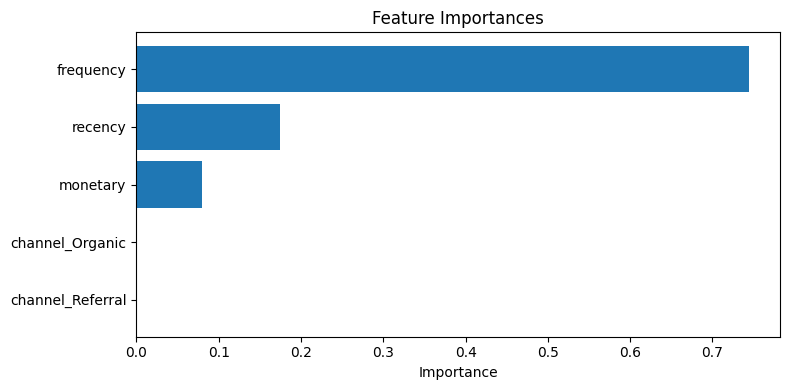

In [22]:
# Sort and plot
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [21]:
# Create dataframe with id and estimate of CATE, then export them to a csv file
pronosticos = pd.DataFrame({'id': nuevos['id'],'tau': efecto})
pronosticos.to_csv('pronosticos.csv',index=False)
pronosticos

,id,tau
0,20001,52.497374
1,20002,-6.891448
2,20003,-25.875260
3,20004,-34.932156
4,20005,39.163785
...,...,...
79995,99996,-16.189181
79996,99997,-18.161320
79997,99998,53.823518
79998,99999,7.783462
